In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Analysing the usage of AI assistant by students**

In [53]:
my_data=pd.read_csv('/Users/sahilchakraborty/Desktop/Data_analysis/Analysis2/AI_assistant_usage.csv')
my_data['SessionDate']=pd.to_datetime(my_data['SessionDate'])
my_data['Months']=my_data['SessionDate'].dt.month
my_data['Years']=my_data['SessionDate'].dt.year
my_data.head(10)


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Months,Years
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,11,2024
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,8,2024
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,1,2025
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,5,2025
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,3,2025
5,SESSION00006,Graduate,Business,2025-01-17,7.54,1,Coding,5,Idea Drafted,True,5.0,1,2025
6,SESSION00007,High School,Biology,2024-09-07,14.60,3,Writing,3,Assignment Completed,False,1.9,9,2024
7,SESSION00008,Undergraduate,Biology,2024-12-26,9.20,3,Writing,5,Assignment Completed,True,3.9,12,2024
8,SESSION00009,Undergraduate,Business,2025-06-18,8.15,1,Brainstorming,3,Assignment Completed,True,3.3,6,2025
9,SESSION00010,Undergraduate,Math,2025-04-14,5.57,1,Studying,3,Assignment Completed,False,1.4,4,2025


**Analysing wheather AI assistance level correlate with satisfaction**

In [31]:
data1=my_data.groupby('AI_AssistanceLevel')['SatisfactionRating'].mean().round(2).reset_index()
data1.head(5)

,AI_AssistanceLevel,SatisfactionRating
0,1,1.33
1,2,2.00
2,3,2.99
3,4,3.96
4,5,4.67


/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_40349/620050506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI_AssistanceLevel', y='SatisfactionRating', data=data1, palette='viridis')


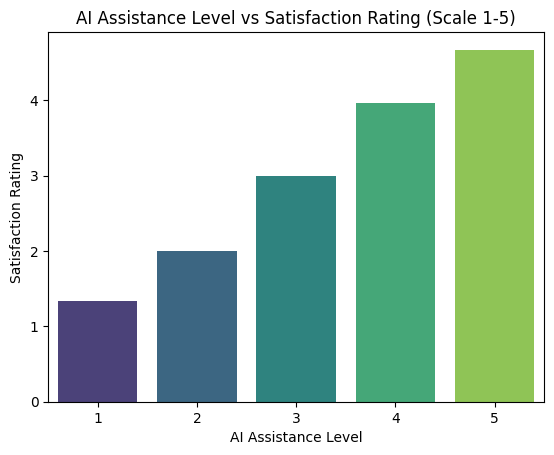

In [39]:
# Plotting the data
plt.title('AI Assistance Level vs Satisfaction Rating (Scale 1-5)')
sns.barplot(x='AI_AssistanceLevel', y='SatisfactionRating', data=data1, palette='viridis')
plt.xlabel('AI Assistance Level')
plt.ylabel('Satisfaction Rating')
plt.show()

**Analysing which task type takes the most time on average**

In [40]:
data2=my_data.groupby('TaskType')['SessionLengthMin'].mean().round(2)
data2.head(6)

TaskType
Brainstorming    21.96
Coding           19.47
Homework Help    19.94
Research         20.41
Studying         19.71
Writing          19.71
Name: SessionLengthMin, dtype: float64

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_40349/476171795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data2.index,x= data2.values, palette='viridis')


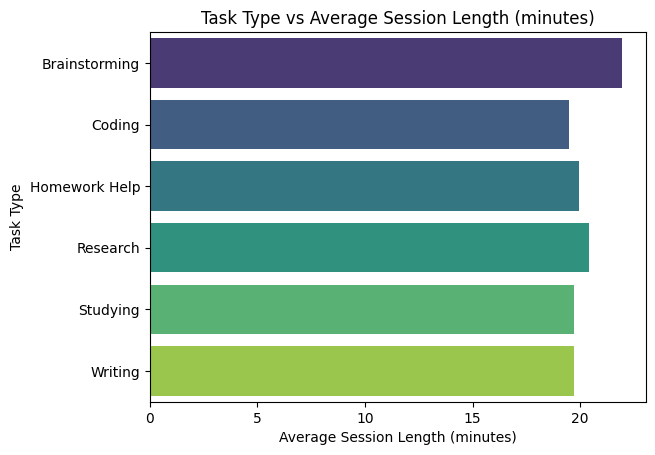

In [41]:
# Plotting the data
plt.title('Task Type vs Average Session Length (minutes)')
sns.barplot(y=data2.index,x= data2.values, palette='viridis')
plt.ylabel('Task Type')
plt.xlabel('Average Session Length (minutes)')
plt.show()

**Analysing which discipline requests the most prompts per session**

In [71]:
data3=my_data.groupby('Discipline')['TotalPrompts'].max().round(2)
data3.head(10)

Discipline
Biology             39
Business            38
Computer Science    39
Engineering         33
History             30
Math                28
Psychology          38
Name: TotalPrompts, dtype: int64

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_40349/3047149307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data3.index,x= data3.values, palette='viridis')


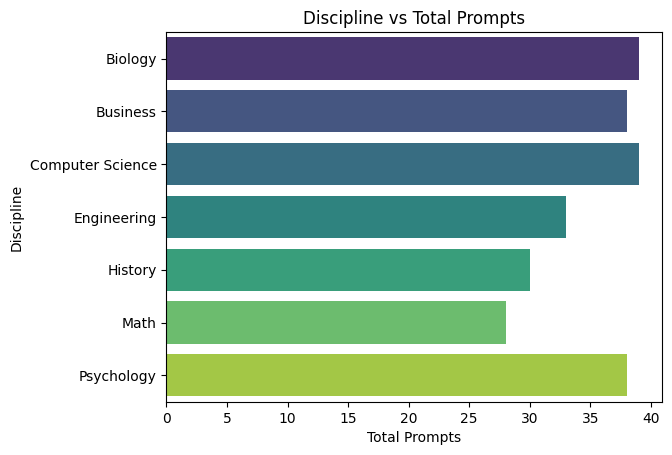

In [72]:
#plotting the data
plt.title('Discipline vs Total Prompts')
sns.barplot(y=data3.index,x= data3.values, palette='viridis')
plt.ylabel('Discipline')
plt.xlabel('Total Prompts')
plt.show()

**Analysing AI usage by students of different level of each task types**

In [83]:
data4=my_data.groupby('StudentLevel')['TaskType'].value_counts().unstack().fillna(0)
data4.head(10)

TaskType,Brainstorming,Coding,Homework Help,Research,Studying,Writing
StudentLevel,,,,,,
Graduate,99,399,399,114,382,602
High School,90,373,395,97,442,630
Undergraduate,287,1176,1165,265,1216,1869


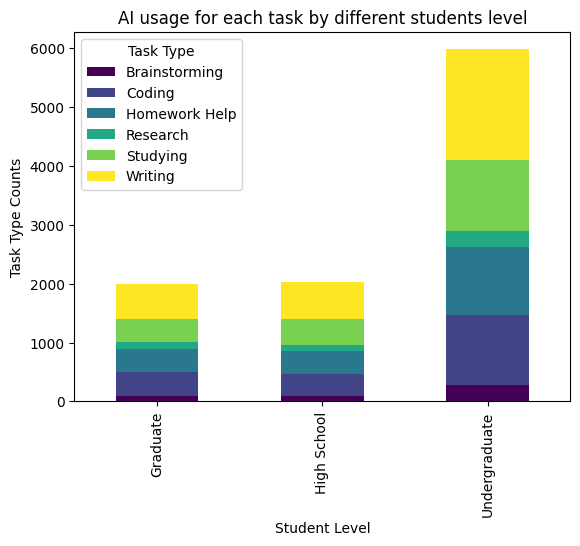

In [93]:
# Plotting the data

df=data4.plot(kind='bar',title='AI usage for each task by different students level', stacked=True, colormap='viridis')
plt.xlabel('Student Level')
plt.ylabel('Task Type Counts')
plt.legend(title='Task Type')
plt.show()

**Conclusion**

The analysis reveals several clear insights into AI assistant usage patterns:

* AI Assistance Level vs Satisfaction – Higher assistance levels (4–5) consistently yield higher satisfaction ratings, showing a direct correlation between guidance depth and user contentment.

* Task Type vs Session Length – Brainstorming sessions tend to last longer than other tasks, suggesting deeper engagement, whereas Coding and   Writing have moderately long sessions.

* Discipline vs Total Prompts – Computer Science, Psychology, and Biology disciplines show the highest average prompts, indicating heavier reliance on AI for academic support.

* Student Level vs Task Usage – Undergraduates dominate AI usage across all task types, especially in Writing and Studying, while High School and Graduate users show balanced but lower activity.

==============================================================================================================================================

**Overall, the findings suggest that AI is most impactful in writing-heavy and study-focused contexts, especially for undergraduate students, with higher assistance levels translating into greater user satisfaction.**